# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [6]:
# Your code here. 
import pandas as pd
student_data = pd.DataFrame({'X': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Y': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

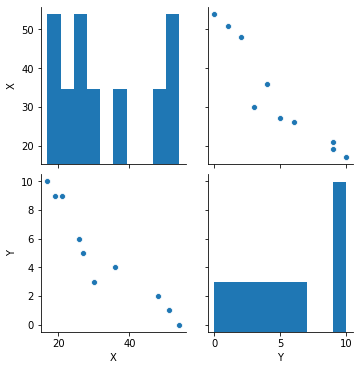

In [9]:
# Your code here.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


sns.pairplot(student_data)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
#we see negative correlation, close to perfect. The dependence is the following: the older the student, the less s/he is late

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [15]:
# Your response here.
print('Correlation:', student_data['X'].corr(student_data['Y']))
print('Covariance:', student_data['X'].cov(student_data['Y']))
# Covariance indicates the direction of the linear relationship between variables. 
# Correlation measures both the strength and direction of the linear relationship between two variables

Correlation: -0.9391626886887122
Covariance: -45.56666666666667


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [ ]:
#Linear regression

In [33]:
# Your response here.
# import sys
# !{sys.executable} -m pip install scipy
from sklearn.linear_model import LinearRegression
from scipy import stats

X = student_data['X']
Y = student_data['Y']
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

print ('The slope is: ' + str(slope))
print ('The intercept is: ' + str(intercept))

model = LinearRegression()
model.fit(student_data['X'].values.reshape(-1,1), student_data['Y'].values.reshape(-1,1))

The slope is: -0.24282077091598084
The intercept is: 12.88880336313577


LinearRegression()

In [21]:
predictions = [intercept + slope*x for x in student_data['X']]
predictions

[8.760850257564096,
 0.5049440464207464,
 6.332642548404287,
 7.789567173900172,
 4.14725561016046,
 1.23340635916869,
 8.275208715732134,
 6.575463319320268,
 -0.2235182663271953,
 5.604180235656345]

In [22]:
residuals = [student_data['Y'][i] - predictions[i] for i in range(len(student_data['Y']))]
residuals

[1.2391497424359041,
 0.4950559535792536,
 -1.3326425484042872,
 1.2104328260998276,
 -0.1472556101604603,
 0.7665936408313101,
 0.7247912842678659,
 -0.5754633193202681,
 0.2235182663271953,
 -2.6041802356563446]

In [30]:
import numpy as np
MSE = (np.mean([residual**2 for residual in residuals]))
MSE
RMSE = np.sqrt((np.mean([residual**2 for residual in residuals])))
RMSE

1.1540884648655088

In [31]:
# percentage error:
(RMSE / student_data['Y'].mean()) * 100

23.55282581358181

Plot your regression model on your scatter plot.

<AxesSubplot:xlabel='X', ylabel='Y'>

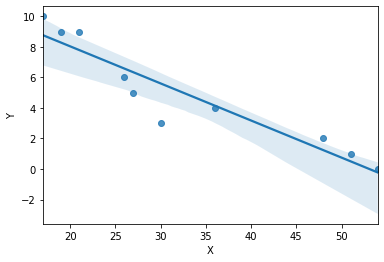

In [50]:
# Your code here.
sns.regplot(x='X', y='Y', data=student_data)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 
"""
percentage error is 23.5, not so small, but we can be quite confident in these conclusions,
that the older you get, the less tardies there are.
It may be not a perfect predictor, but there is such tendency.
"""


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [35]:
# Import any libraries you may need & the data
data = pd.read_csv('/Users/victoria/Downloads/vehicles.csv')
data

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [53]:
# Your response here. 
data1 = data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
data1.corr()
print('corr with year:', data1['Year'].corr(data['CO2 Emission Grams/Mile']))
print('corr with cylinders:', data1['Cylinders'].corr(data['CO2 Emission Grams/Mile']))
print('corr with fuel barrels/year:', data1['Fuel Barrels/Year'].corr(data['CO2 Emission Grams/Mile']))#the highest correlation, most important
print('corr with combined mpg:', data1['Combined MPG'].corr(data['CO2 Emission Grams/Mile']))
print('corr with fuel cost/year:', data1['Fuel Cost/Year'].corr(data['CO2 Emission Grams/Mile']))#least helpful info, cost of fuel doesn't influence CO2 Emissions 

corr with year: -0.22229960295054227
corr with cylinders: 0.7523925537297492
corr with fuel barrels/year: 0.9861886621428733
corr with combined mpg: -0.9262290389336439
corr with fuel cost/year: 0.9308651512201842


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

<AxesSubplot:xlabel='Fuel Barrels/Year', ylabel='CO2 Emission Grams/Mile'>

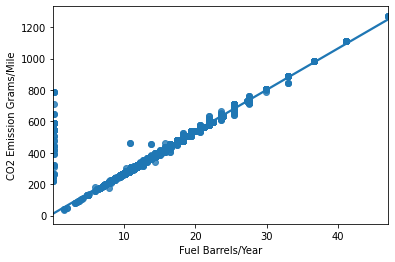

In [55]:
# Your response here. 
sns.regplot(x='Fuel Barrels/Year', y='CO2 Emission Grams/Mile', data=data)
#it's linear regression, values are very close to the line

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 
"""
it makes sense - the more fuel the vehicle need - the more CO2 emissions it produces, as the amount increases.

"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 